### Problem Statement :

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google.
Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When 
these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the 
company also gets leads through past referrals. 

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, 
some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%. 


X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying 
customers. 

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead 
score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


### Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')  
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing data
# Importing dataset

leaddf = pd.read_csv('Leads.csv', encoding = 'latin')
leaddf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leaddf.shape

(9240, 37)

In [4]:
leaddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leaddf.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data cleaning 

In [6]:
#cheak the coloumns with null values
leaddf.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Check if there are any duplicate values in the dataset

leaddf[leaddf.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


there are no duplicate values 

In [8]:
# check for percentage of null values in each column

percent_missing = round(100*(leaddf.isnull().sum()/len(leaddf.index)), 2)
print(percent_missing)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

there are coloums that have more than 25% of missing values 

In [9]:
# Get the value counts of all the columns

for column in leaddf:
    print(leaddf[column].astype('category').value_counts())
    print('================================================')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [10]:
leaddf.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Also, the variable What matters most to you in choosing a course has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [11]:
leaddf['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [12]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

leaddf.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [13]:
# Following columns have a value called select.
#Convert those values as nan since the customer has not selected any options for these columns while entering the data.

# Converting 'Select' values to NaN.

leaddf['How did you hear about X Education'] = leaddf['How did you hear about X Education'].replace('Select', np.nan)
leaddf['Lead Profile'] = leaddf['Lead Profile'].replace('Select', np.nan)
leaddf['City'] = leaddf['City'].replace('Select', np.nan)

In [14]:
# check for percentage of null values in each column

percent_missing = round(100*(leaddf.isnull().sum()/len(leaddf.index)), 2)
print(percent_missing)


Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            15.56
How did you hear about X Education        78.46
What is your current occupation           29.11
Tags                                      36.29
Lead Quality                              51.59
Lead Profile                              74.19
City                                      39.71
Asymmetrique Activity Index               45.65
Asymmetrique Profile Index                45.65
Asymmetrique Activity Score             

In [15]:
# Let us drop the following columns that have more than 30% null values
 
leaddf = leaddf.drop([ 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

let us remove country from the data it is not of much use

In [16]:
leaddf.drop(['Country'], axis = 1, inplace = True)

In [17]:
# Check the number of null values again

leaddf.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [18]:
leaddf.shape

(9240, 14)

In [19]:
leaddf.shape

(9240, 14)

In [20]:
# Check the value counts for the column Lead Source

leaddf['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [21]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

leaddf['Lead Source'] = leaddf['Lead Source'].replace('google', 'Google')
leaddf['Lead Source'] = leaddf['Lead Source'].replace(np.nan, 'Google')

In [22]:
leaddf.shape

(9240, 14)

In [23]:
# Check the value counts for the column Total Visits

leaddf['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [24]:
# Check the median of column 

leaddf['TotalVisits'].median()

3.0

In [25]:
# We shall impute the null values in TotalVisits by the median value which is 3.0

leaddf['TotalVisits'] = leaddf['TotalVisits'].replace(np.nan, leaddf['TotalVisits'].median())

In [26]:
leaddf.shape


(9240, 14)

In [27]:
# Check the value counts for Page Views Per Visit

leaddf['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [28]:
# Check the median of the column

leaddf['Page Views Per Visit'].median()

2.0

In [29]:
# We shall impute the null values in 'Page Views Per Visit' by the median value which is 2.0

leaddf['Page Views Per Visit'] = leaddf['Page Views Per Visit'].replace(np.nan, leaddf['Page Views Per Visit'].median())

In [30]:
leaddf.shape

(9240, 14)

In [31]:
# Check the value counts for the column Last Activity

leaddf['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [32]:
# Since we do not have any information of what the last activity of the customer would have been, we can add a new category 
# called 'Not Sure' for the null values

leaddf['Last Activity'] = leaddf['Last Activity'].replace(np.nan, 'Not Sure')

In [33]:
# Check the value counts for the column "What is your current Occupation"

leaddf['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
leaddf.shape

(9240, 14)

In [35]:
percent_missing = round(100*(leaddf.isnull().sum()/len(leaddf.index)), 2)
print(percent_missing)


Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                            15.56
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64


In [36]:
leaddf.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

All the null values in the columns now have either been imputed or we have dropped the columns which have more than 70% data concentrated towards one value

In [37]:
leaddf = leaddf[~pd.isnull(leaddf['Specialization'])]

In [38]:
leaddf = leaddf[~pd.isnull(leaddf['What is your current occupation'])]

In [39]:
leaddf.shape

(6532, 14)

In [40]:
print(len(leaddf.index))
print(len(leaddf.index)/9240)


6532
0.706926406926407


We still have around 70% of the rows which seems good enough.

In [41]:
leaddf.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

##### Outlier Treatment¶

In [42]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leaddf.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6532.000000,6532.000000,6532.000000,6532.000000
mean,0.488518,3.595989,540.843693,2.460196
std,0.499906,4.993102,568.185493,2.147953
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,35.000000,1.000000
50%,0.000000,3.000000,293.000000,2.000000
75%,1.000000,5.000000,1031.250000,3.500000
90%,1.000000,7.000000,1438.900000,5.000000
95%,1.000000,10.000000,1600.450000,6.000000
99%,1.000000,17.000000,1850.690000,9.000000


From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

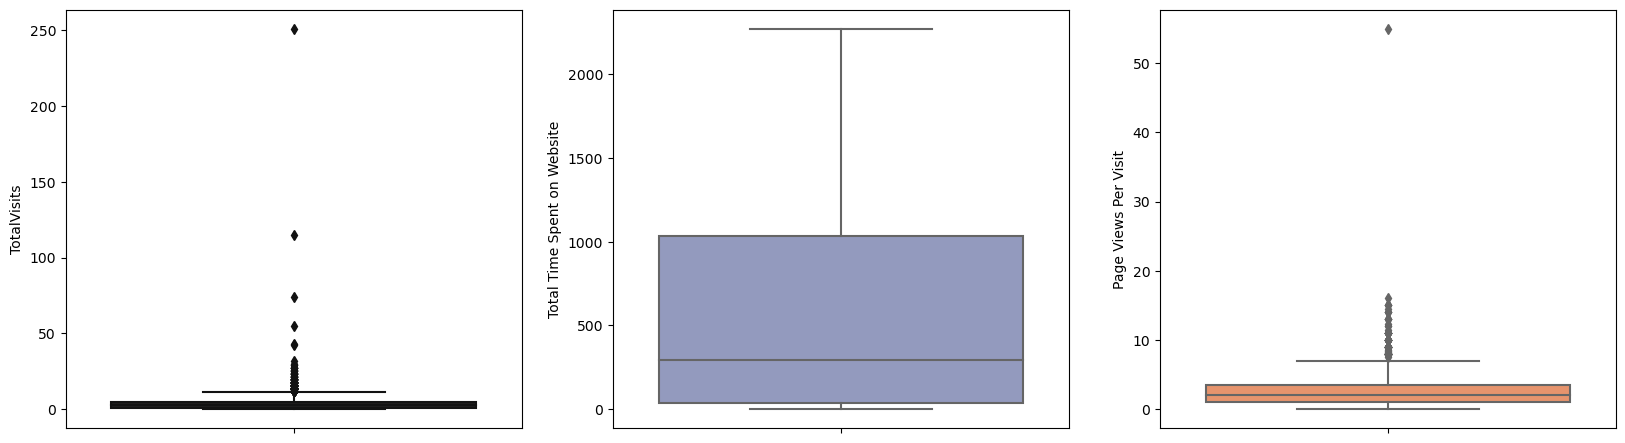

In [43]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='icefire', data = leaddf)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='BuPu', data = leaddf)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='OrRd', data = leaddf)
plt.show()

In [44]:
# Removing values beyond 99% for Total Visits

ot = leaddf['TotalVisits'].quantile(0.99)
leaddf = leaddf[leaddf["TotalVisits"] < ot]
leaddf["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    6455.000000
mean        3.316344
std         2.923040
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [45]:
# Checking outliers at 25%,50%,75%,90%,95% and above

leaddf.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6455.000000,6455.000000,6455.000000,6455.000000
mean,0.488768,3.316344,539.390705,2.430288
std,0.499913,2.923040,568.068919,2.026605
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,32.000000,1.000000
50%,0.000000,3.000000,290.000000,2.000000
75%,1.000000,5.000000,1029.500000,3.330000
90%,1.000000,7.000000,1437.200000,5.000000
95%,1.000000,9.000000,1600.300000,6.000000
99%,1.000000,13.000000,1850.460000,9.000000


In [46]:
# Removing values beyond 99% for page Views Per Visit

out = leaddf['Page Views Per Visit'].quantile(0.99)
leaddf = leaddf[leaddf["Page Views Per Visit"] < out]
leaddf["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    6373.000000
mean        2.327398
std         1.811781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [47]:
# Checking outliers at 25%,50%,75%,90%,95% and above

leaddf.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6373.000000,6373.000000,6373.000000,6373.000000
mean,0.489095,3.224855,536.591244,2.327398
std,0.499920,2.819780,568.196142,1.811781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,31.000000,1.000000
50%,0.000000,3.000000,287.000000,2.000000
75%,1.000000,5.000000,1029.000000,3.000000
90%,1.000000,7.000000,1434.800000,5.000000
95%,1.000000,9.000000,1600.000000,6.000000
99%,1.000000,13.000000,1850.280000,7.000000


In [48]:
print(len(leaddf.index))
print(len(leaddf.index)/9240)


6373
0.6897186147186147


We still have around 68% of the rows which seems good enough.

### Data Analysis

In [49]:
leaddf.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Text(-3.9305555555555483, 0.5, 'Count')

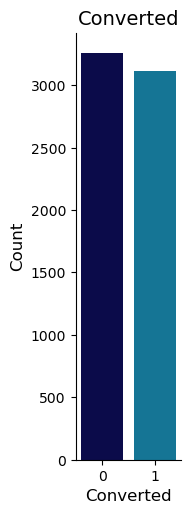

In [50]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=leaddf, palette='ocean', aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)


Text(36.83568990559188, 0.5, 'Count')

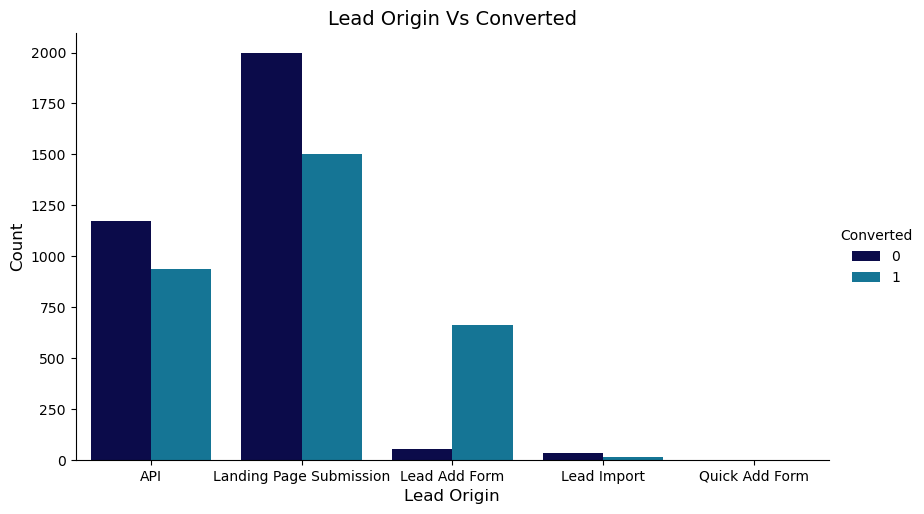

In [51]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leaddf, palette='ocean', aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

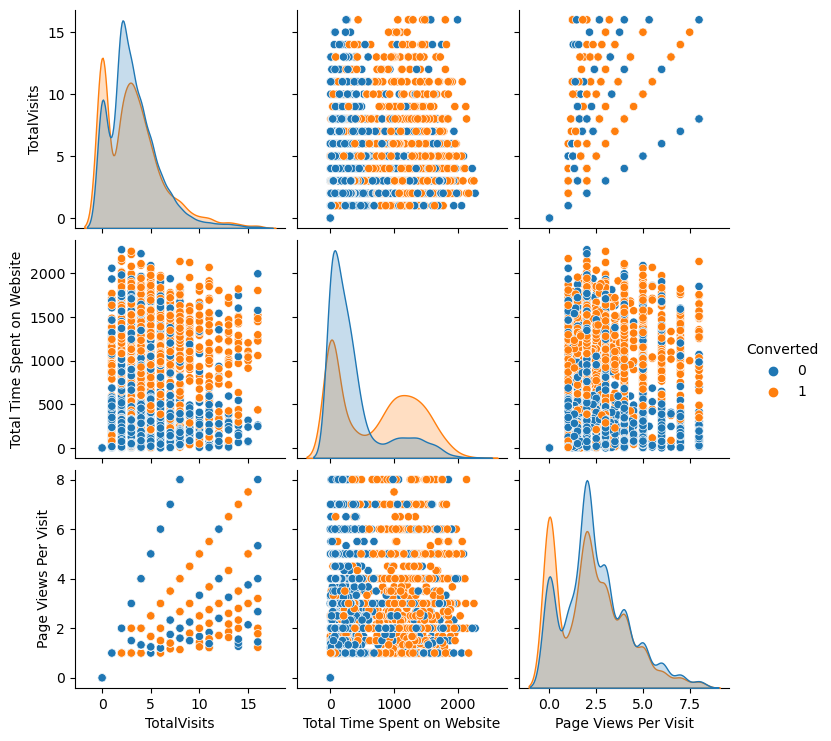

In [52]:
sns.pairplot(leaddf,diag_kind='kde',hue='Converted')
plt.show()

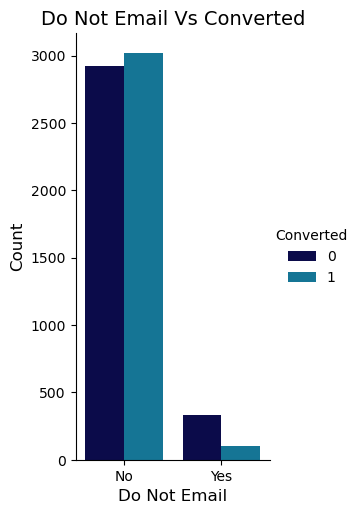

In [53]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=leaddf, palette="ocean", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)


plt.show()

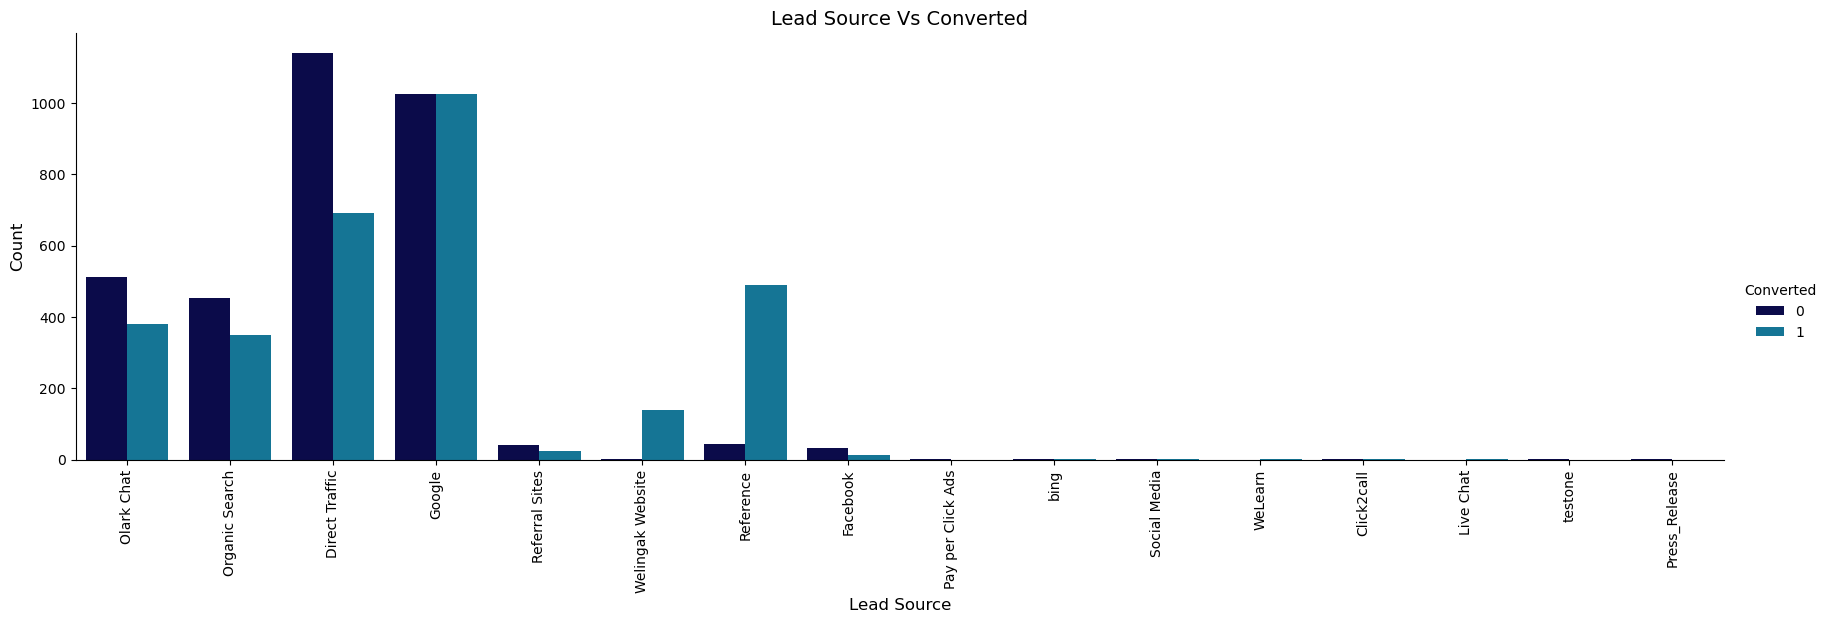

In [54]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=leaddf, palette="ocean", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

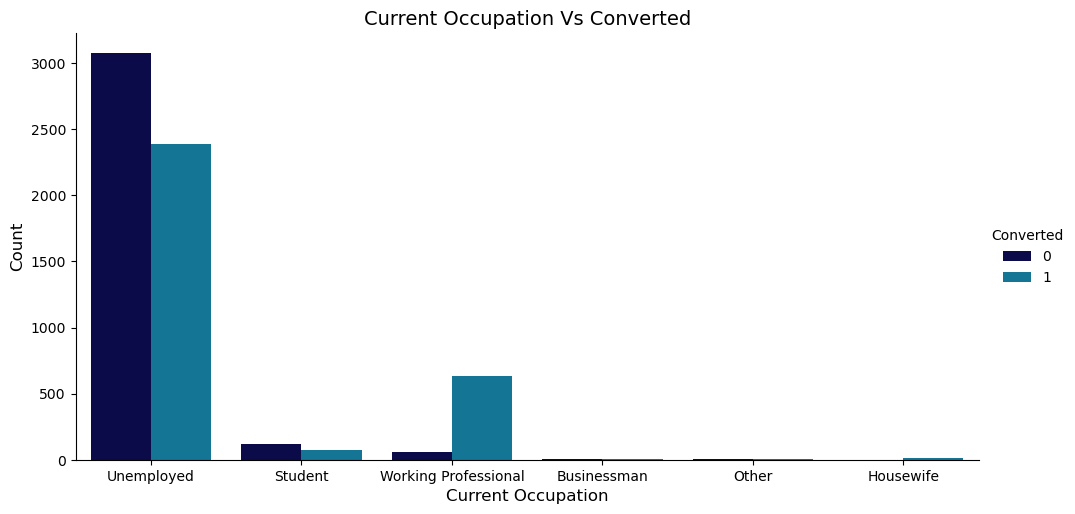

In [55]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=leaddf, palette="ocean", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

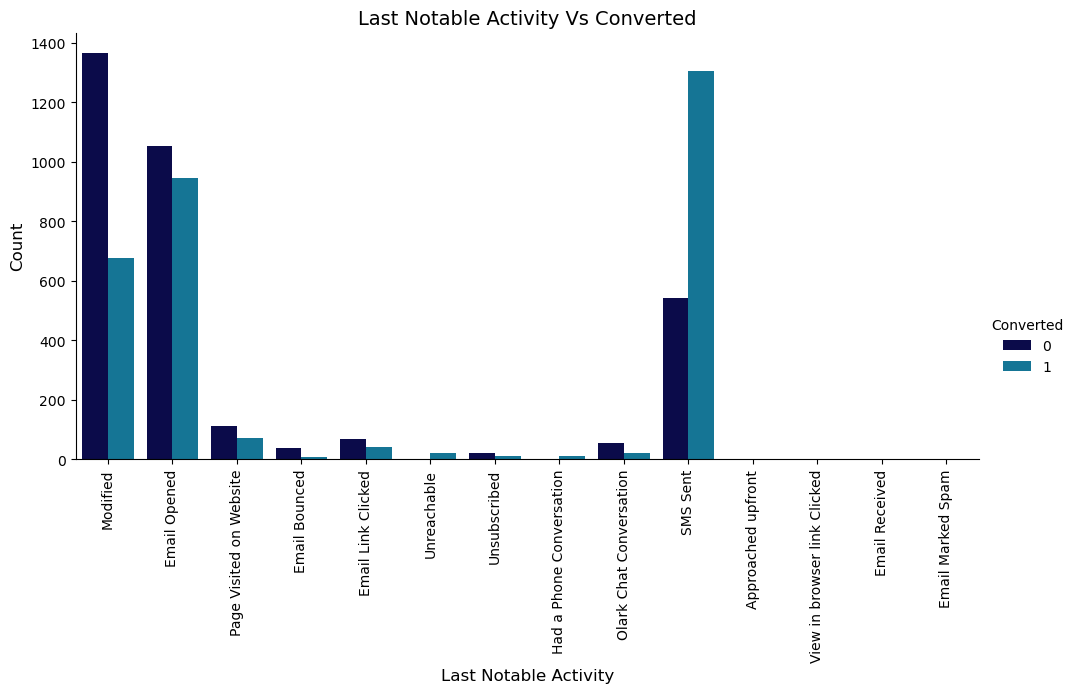

In [56]:
# What is your current occupation

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=leaddf, palette="ocean", 
                   aspect = 2.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

In [57]:
temp = leaddf.loc[:, leaddf.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [58]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leaddf[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leaddf = pd.concat([leaddf, dummy], axis=1)

In [59]:
#Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leaddf['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leaddf = pd.concat([leaddf, dummy_spl], axis = 1)

In [60]:
# Drop the variables for which the dummy variables have been created

leaddf = leaddf.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [61]:
leaddf.shape

(6373, 77)

Since there are around 77 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data

### Test-Train Split


In [62]:
# Import the required library

from sklearn.model_selection import train_test_split
# Put all the feature variables in X

X = leaddf.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Put the target variable in y

y = leaddf['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [64]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [65]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
7999,0.0625,0.094097,0.125,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
207,0.3125,0.158899,0.625,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4139,0.1875,0.522415,0.375,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4004,0.0000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3610,0.0000,0.000000,0.000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Model Building

In [66]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
# Import statsmodels

import statsmodels.api as sm
logreg = LogisticRegression()
# Import RFE and select 15 variables



In [67]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [68]:
# Let's take a look at which features have been selected by RFE


list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 60),
 ('Lead Origin_Quick Add Form', False, 62),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', False, 55),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Pay per Click Ads', False, 44),
 ('Lead Source_Press_Release', False, 57),
 ('Lead Source_Reference', False, 49),
 ('Lead Source_Referral Sites', False, 5),
 ('Lead Source_Social Media', False, 17),
 ('Lead Source_WeLearn', False, 40),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 54),
 ('Lead Source_testone', False, 61),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 9),
 ('Last Activity_Email Bounced', 

In [69]:
rfe.support_

array([ True,  True,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False,  True, False,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [70]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [71]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [72]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1966.4
Date:                Sun, 13 Aug 2023   Deviance:                       3932.8
Time:                        18:34:38   Pearson chi2:                 4.71e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3961
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7883      0.616     -2.905      0.004      -2.995      -0.582
TotalVisits                                              2.4975      0.327      7.633      0.000       1.856       3.139
Total Time Spent on Website                              4.5429      0.190     23.872      0.000       4.170       4.916
Page Views Per Visit                                    -1.1530      0.275     -4.194      0.000      -1.692      -0.614
Lead Origin_Lead Add Form                                3.8751      0.227     17.054      0.000       3.430       4.320
Lead Source_Olark Chat                                   1.7742      0.150     11.846      0.000       1.481       2.068
Lead Source_Welingak Website                             2.6900      1.026      2.621      0.009       0.678       4.702
Do Not Email_Yes                                        -1.6122      0.197     -8.170      0.000      -1.999      -1.225
Last Activity_Olark Chat Conversation                   -1.3652      0.199     -6.875      0.000      -1.754      -0.976
Last Activity_SMS Sent                                   1.3408      0.086     15.522      0.000       1.172       1.510
What is your current occupation_Housewife               23.2234   2.66e+04      0.001      0.999   -5.22e+04    5.23e+04
What is your current occupation_Student                 -0.5299      0.638     -0.830      0.406      -1.781       0.721
What is your current occupation_Unemployed              -0.6426      0.601     -1.068      0.285      -1.821       0.536
What is your current occupation_Working Professional     1.8201      0.627      2.904      0.004       0.592       3.048
Last Notable Activity_Had a Phone Conversation          24.0259   1.97e+04      0.001      0.999   -3.85e+04    3.86e+04
Last Notable Activity_Unreachable                        2.8164      0.809      3.482      0.000       1.231       4.402
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

In [73]:
 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,6.84
2,Page Views Per Visit,6.61
0,TotalVisits,4.87
1,Total Time Spent on Website,2.38
12,What is your current occupation_Working Profes...,1.97
3,Lead Origin_Lead Add Form,1.94
4,Lead Source_Olark Chat,1.93
8,Last Activity_SMS Sent,1.64
5,Lead Source_Welingak Website,1.30
7,Last Activity_Olark Chat Conversation,1.21


Let's first drop the variable What is your current occupation_Housewife since it has a high p-value

In [74]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [75]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1968.9
Date:                Sun, 13 Aug 2023   Deviance:                       3937.9
Time:                        18:34:38   Pearson chi2:                 4.71e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3954
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2436      0.573     -2.172      0.030      -2.366      -0.121
TotalVisits                                              2.4828      0.327      7.592      0.000       1.842       3.124
Total Time Spent on Website                              4.5334      0.190     23.854      0.000       4.161       4.906
Page Views Per Visit                                    -1.1595      0.275     -4.218      0.000      -1.698      -0.621
Lead Origin_Lead Add Form                                3.8705      0.227     17.052      0.000       3.426       4.315
Lead Source_Olark Chat                                   1.7639      0.150     11.794      0.000       1.471       2.057
Lead Source_Welingak Website                             2.6861      1.026      2.617      0.009       0.674       4.698
Do Not Email_Yes                                        -1.6175      0.198     -8.190      0.000      -2.005      -1.230
Last Activity_Olark Chat Conversation                   -1.3725      0.199     -6.904      0.000      -1.762      -0.983
Last Activity_SMS Sent                                   1.3398      0.086     15.517      0.000       1.171       1.509
What is your current occupation_Student                 -1.0645      0.599     -1.777      0.076      -2.238       0.109
What is your current occupation_Unemployed              -1.1770      0.560     -2.103      0.035      -2.274      -0.080
What is your current occupation_Working Professional     1.2850      0.586      2.191      0.028       0.136       2.434
Last Notable Activity_Had a Phone Conversation          23.0254   1.19e+04      0.002      0.998   -2.34e+04    2.34e+04
Last Notable Activity_Unreachable                        2.8142      0.809      3.480      0.001       1.229       4.399
========================================================================================================================
"""

In [76]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,6.79
2,Page Views Per Visit,6.59
0,TotalVisits,4.87
1,Total Time Spent on Website,2.37
11,What is your current occupation_Working Profes...,1.96
4,Lead Source_Olark Chat,1.93
3,Lead Origin_Lead Add Form,1.92
8,Last Activity_SMS Sent,1.64
5,Lead Source_Welingak Website,1.30
7,Last Activity_Olark Chat Conversation,1.21


Last Notable Activity_Had a Phone Conversation need to be dropped

In [77]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [78]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1977.8
Date:                Sun, 13 Aug 2023   Deviance:                       3955.5
Time:                        18:34:38   Pearson chi2:                 4.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3930
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2457      0.572     -2.176      0.030      -2.368      -0.124
TotalVisits                                              2.4706      0.326      7.579      0.000       1.832       3.110
Total Time Spent on Website                              4.5204      0.190     23.853      0.000       4.149       4.892
Page Views Per Visit                                    -1.1281      0.274     -4.117      0.000      -1.665      -0.591
Lead Origin_Lead Add Form                                3.8659      0.227     17.044      0.000       3.421       4.310
Lead Source_Olark Chat                                   1.7595      0.149     11.788      0.000       1.467       2.052
Lead Source_Welingak Website                             2.6871      1.026      2.618      0.009       0.675       4.699
Do Not Email_Yes                                        -1.6220      0.197     -8.224      0.000      -2.009      -1.235
Last Activity_Olark Chat Conversation                   -1.3796      0.199     -6.944      0.000      -1.769      -0.990
Last Activity_SMS Sent                                   1.3259      0.086     15.393      0.000       1.157       1.495
What is your current occupation_Student                 -1.0601      0.599     -1.771      0.077      -2.234       0.113
What is your current occupation_Unemployed              -1.1647      0.559     -2.082      0.037      -2.261      -0.068
What is your current occupation_Working Professional     1.2940      0.586      2.207      0.027       0.145       2.443
Last Notable Activity_Unreachable                        2.7980      0.808      3.461      0.001       1.213       4.383
========================================================================================================================
"""

In [79]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,6.79
2,Page Views Per Visit,6.59
0,TotalVisits,4.87
1,Total Time Spent on Website,2.37
11,What is your current occupation_Working Profes...,1.96
3,Lead Origin_Lead Add Form,1.92
4,Lead Source_Olark Chat,1.92
8,Last Activity_SMS Sent,1.64
5,Lead Source_Welingak Website,1.30
7,Last Activity_Olark Chat Conversation,1.21


'What is your current occupation_Working Professional' need to be dropped due to high vif value

In [80]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [81]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1980.0
Date:                Sun, 13 Aug 2023   Deviance:                       3959.9
Time:                        18:34:39   Pearson chi2:                 4.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3924
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.0458      0.202     -0.227      0.821      -0.442       0.350
TotalVisits                                    2.4535      0.326      7.520      0.000       1.814       3.093
Total Time Spent on Website                    4.5145      0.189     23.837      0.000       4.143       4.886
Page Views Per Visit                          -1.1316      0.274     -4.127      0.000      -1.669      -0.594
Lead Origin_Lead Add Form                      3.8582      0.227     17.020      0.000       3.414       4.302
Lead Source_Olark Chat                         1.7518      0.149     11.748      0.000       1.460       2.044
Lead Source_Welingak Website                   2.6866      1.026      2.618      0.009       0.675       4.698
Do Not Email_Yes                              -1.6224      0.197     -8.223      0.000      -2.009      -1.236
Last Activity_Olark Chat Conversation         -1.3907      0.199     -6.975      0.000      -1.782      -1.000
Last Activity_SMS Sent                         1.3306      0.086     15.473      0.000       1.162       1.499
What is your current occupation_Student       -2.2522      0.278     -8.112      0.000      -2.796      -1.708
What is your current occupation_Unemployed    -2.3580      0.176    -13.408      0.000      -2.703      -2.013
Last Notable Activity_Unreachable              2.8038      0.808      3.472      0.001       1.221       4.387
==============================================================================================================
"""

In [82]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.01
0,TotalVisits,4.76
10,What is your current occupation_Unemployed,4.18
1,Total Time Spent on Website,2.18
4,Lead Source_Olark Chat,1.61
8,Last Activity_SMS Sent,1.56
3,Lead Origin_Lead Add Form,1.49
5,Lead Source_Welingak Website,1.29
7,Last Activity_Olark Chat Conversation,1.21
9,What is your current occupation_Student,1.11


Page Views Per Visit  need to be dropped due to high vif value

In [83]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [84]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1988.6
Date:                Sun, 13 Aug 2023   Deviance:                       3977.2
Time:                        18:34:39   Pearson chi2:                 4.73e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3900
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.2863      0.194     -1.479      0.139      -0.666       0.093
TotalVisits                                    1.7481      0.273      6.397      0.000       1.212       2.284
Total Time Spent on Website                    4.4959      0.189     23.779      0.000       4.125       4.866
Lead Origin_Lead Add Form                      4.0831      0.221     18.474      0.000       3.650       4.516
Lead Source_Olark Chat                         1.9780      0.140     14.130      0.000       1.704       2.252
Lead Source_Welingak Website                   2.6964      1.026      2.627      0.009       0.685       4.708
Do Not Email_Yes                              -1.6235      0.197     -8.239      0.000      -2.010      -1.237
Last Activity_Olark Chat Conversation         -1.3648      0.198     -6.897      0.000      -1.753      -0.977
Last Activity_SMS Sent                         1.2925      0.085     15.183      0.000       1.126       1.459
What is your current occupation_Student       -2.2328      0.278     -8.020      0.000      -2.778      -1.687
What is your current occupation_Unemployed    -2.3428      0.175    -13.350      0.000      -2.687      -1.999
Last Notable Activity_Unreachable              2.7946      0.808      3.460      0.001       1.212       4.377
==============================================================================================================
"""

In [85]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
9,What is your current occupation_Unemployed,3.57
0,TotalVisits,2.80
1,Total Time Spent on Website,2.14
7,Last Activity_SMS Sent,1.52
3,Lead Source_Olark Chat,1.50
2,Lead Origin_Lead Add Form,1.44
4,Lead Source_Welingak Website,1.29
6,Last Activity_Olark Chat Conversation,1.21
8,What is your current occupation_Student,1.09
5,Do Not Email_Yes,1.08


### Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [86]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7999    0.120105
207     0.161223
4139    0.977727
4004    0.984236
3610    0.201109
197     0.108560
2022    0.839429
6384    0.958782
6478    0.348753
2063    0.151922
dtype: float64

In [87]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1201048 , 0.16122311, 0.97772676, 0.98423588, 0.20110873,
       0.10855981, 0.83942898, 0.95878245, 0.34875334, 0.15192226])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [88]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.120105,7999
1,0,0.161223,207
2,1,0.977727,4139
3,1,0.984236,4004
4,0,0.201109,3610


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [89]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.120105,7999,0
1,0,0.161223,207,0
2,1,0.977727,4139,1
3,1,0.984236,4004,1
4,0,0.201109,3610,0


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [90]:
# Import metrics from sklearn for evaluation

from sklearn import metrics
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1890  386]
 [ 517 1668]]


In [91]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7975790181573639


Accuracy rate is around 80% which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics

In [92]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Calculate the sensitivity

TP/(TP+FN)

0.7633867276887872

In [94]:
# Calculate the specificity

TN/(TN+FP)

0.8304042179261862

In [95]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.1695957820738137


In [96]:
# positive predictive value 

print (TP / float(TP+FP))

0.8120740019474196


In [97]:
# Negative predictive value

print (TN / float(TN+ FN))

0.7852098047361862


### Plotting the ROC Curve

In [98]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

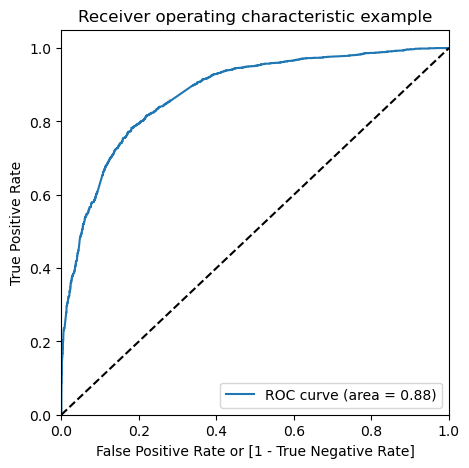

In [100]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the curve of the ROC is 0.88 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

### Finding the Optimal Cutoff

In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.120105,7999,0,1,1,0,0,0,0,0,0,0,0
1,0,0.161223,207,0,1,1,0,0,0,0,0,0,0,0
2,1,0.977727,4139,1,1,1,1,1,1,1,1,1,1,1
3,1,0.984236,4004,1,1,1,1,1,1,1,1,1,1,1
4,0,0.201109,3610,0,1,1,1,0,0,0,0,0,0,0


In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.489800  1.000000  0.000000
0.1   0.1  0.574983  0.988101  0.178383
0.2   0.2  0.736382  0.946911  0.534271
0.3   0.3  0.770903  0.915789  0.631810
0.4   0.4  0.796010  0.821053  0.771968
0.5   0.5  0.797579  0.763387  0.830404
0.6   0.6  0.788164  0.697941  0.874780
0.7   0.7  0.752298  0.580778  0.916960
0.8   0.8  0.725398  0.492906  0.948594
0.9   0.9  0.659942  0.327231  0.979350


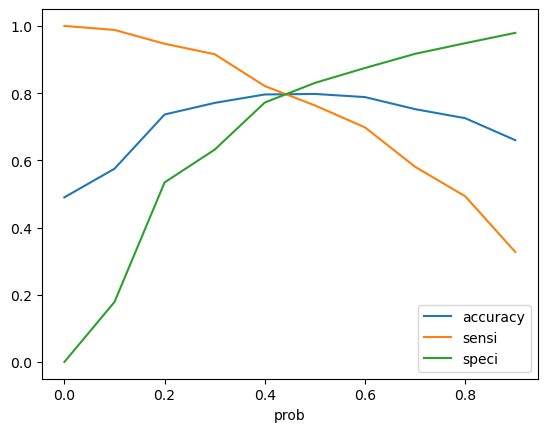

In [103]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.45 is the optimum point to take it as a cutoff probability.

In [104]:
# Let us make the final prediction using 0.45 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.120105,7999,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.161223,207,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.977727,4139,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.984236,4004,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.201109,3610,0,1,1,1,0,0,0,0,0,0,0,0


In [105]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.120105,7999,0,1,1,0,0,0,0,0,0,0,0,0,12
1,0,0.161223,207,0,1,1,0,0,0,0,0,0,0,0,0,16
2,1,0.977727,4139,1,1,1,1,1,1,1,1,1,1,1,1,98
3,1,0.984236,4004,1,1,1,1,1,1,1,1,1,1,1,1,98
4,0,0.201109,3610,0,1,1,1,0,0,0,0,0,0,0,0,20
5,0,0.108560,197,0,1,1,0,0,0,0,0,0,0,0,0,11
6,1,0.839429,2022,1,1,1,1,1,1,1,1,1,1,0,1,84
7,1,0.958782,6384,1,1,1,1,1,1,1,1,1,1,1,1,96
8,0,0.348753,6478,0,1,1,1,1,0,0,0,0,0,0,0,35
9,0,0.151922,2063,0,1,1,0,0,0,0,0,0,0,0,0,15


In [146]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1723
0     462
Name: final_predicted, dtype: int64

In [147]:
# check the precentage of final_predicted conversions

1723/float(1723+462)

0.788558352402746

Hence we can see that the final prediction of conversions have a target of 79% (78.8%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

In [106]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7989240080699395

In [107]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1841,  435],
       [ 462, 1723]], dtype=int64)

In [108]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [109]:
# Calculate Sensitivity

TP/(TP+FN)

0.788558352402746

In [110]:
# Calculate Specificity

TN/(TN+FP)

0.8088752196836555

### Metrics - Precision and Recall

In [111]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1890,  386],
       [ 517, 1668]], dtype=int64)

In [112]:
from sklearn.metrics import precision_score, recall_score

In [113]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8120740019474196

In [114]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7633867276887872

In [115]:
from sklearn.metrics import precision_recall_curve

In [116]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       0
        ..
 4456    0
 4457    1
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       0
        ..
 4456    0
 4457    1
 4458    0
 4459    0
 4460    1
 Name: predicted, Length: 4461, dtype: int64)

In [117]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

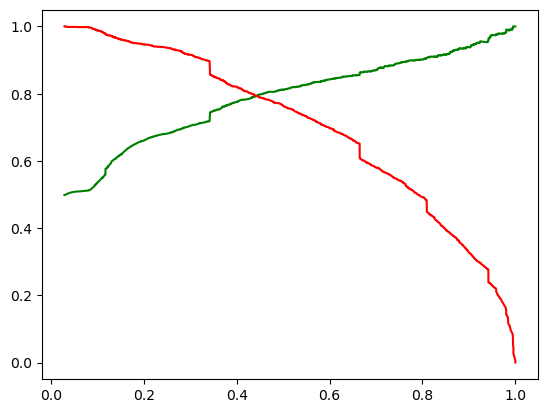

In [118]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [119]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [120]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4731,0.1875,0.039503,0.3750,0,0,0,0,0,0,0,0,1,0,0,0
6070,0.1875,0.338660,0.3750,0,0,0,0,0,0,1,0,0,0,0,0
9202,0.2500,0.420328,0.5000,0,0,0,0,0,1,0,0,1,0,0,0
6545,0.6875,0.001332,0.1525,0,0,0,0,0,0,0,0,1,0,0,0
2646,0.0000,0.000000,0.0000,0,1,0,0,1,0,0,0,1,0,0,0


In [121]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [122]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4731,1.0,0.1875,0.039503,0.3750,0,0,0,0,0,0,0,0,1,0,0,0
6070,1.0,0.1875,0.338660,0.3750,0,0,0,0,0,0,1,0,0,0,0,0
9202,1.0,0.2500,0.420328,0.5000,0,0,0,0,0,1,0,0,1,0,0,0
6545,1.0,0.6875,0.001332,0.1525,0,0,0,0,0,0,0,0,1,0,0,0
2646,1.0,0.0000,0.000000,0.0000,0,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804,1.0,0.0000,0.000000,0.0000,1,0,0,0,0,1,0,0,0,1,0,0
6558,1.0,0.1250,0.442077,0.1250,0,0,0,0,0,0,0,0,1,0,0,0
5481,1.0,0.0625,0.161119,0.1250,0,0,0,0,0,0,0,0,1,0,0,0
3022,1.0,0.0000,0.000000,0.0000,1,0,0,0,0,1,0,0,1,0,0,0


In [123]:
# Drop the required columns from X_test as well

X_test.drop(['What is your current occupation_Housewife','Page Views Per Visit','What is your current occupation_Working Professional','Last Notable Activity_Had a Phone Conversation' ], 1, inplace = True)

In [124]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [125]:
y_test_pred[:10]

4731    0.098367
6070    1.000000
9202    0.704193
6545    0.292430
2646    0.116918
4191    0.905405
3318    0.341474
9090    0.341474
5932    0.805312
3579    0.109029
dtype: float64

In [126]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [127]:
# Let's see the head

y_pred_1.head()

,0
4731,0.098367
6070,1.000000
9202,0.704193
6545,0.292430
2646,0.116918


In [128]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [129]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [130]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [131]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [132]:
y_pred_final.head()

,Converted,LeadId,0
0,1,4731,0.098367
1,1,6070,1.000000
2,0,9202,0.704193
3,0,6545,0.292430
4,0,2646,0.116918


In [133]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [134]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob
0,1,4731,0.098367
1,1,6070,1.000000
2,0,9202,0.704193
3,0,6545,0.292430
4,0,2646,0.116918


In [135]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.45%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.45 else 0)

In [136]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob,final_predicted
0,1,4731,0.098367,0
1,1,6070,1.000000,1
2,0,9202,0.704193,1
3,0,6545,0.292430,0
4,0,2646,0.116918,0


In [137]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,LeadId,Converted_Prob,final_predicted,lead_score
0,1,4731,0.098367,0,10
1,1,6070,1.000000,1,100
2,0,9202,0.704193,1,70
3,0,6545,0.292430,0,29
4,0,2646,0.116918,0,12
5,1,4191,0.905405,1,91
6,0,3318,0.341474,0,34
7,0,9090,0.341474,0,34
8,1,5932,0.805312,1,81
9,0,3579,0.109029,0,11


In [138]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    701
0    231
Name: final_predicted, dtype: int64

In [148]:
# check the precentage of final_predicted conversions on test data

701/float(701+231)

0.7521459227467812

Hence we can see that the final prediction of conversions have a target rate of 75% (75.2%) (Around 3 % short of the predictions made on training data set)

In [139]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7756276150627615

In [140]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[782, 198],
       [231, 701]], dtype=int64)

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7521459227467812

In [143]:
# Let us calculate specificity
TN / float(TN+FP)

0.7979591836734694

### Precision and Recall metrics for the test set

In [144]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7797552836484983
recall  0.7521459227467812


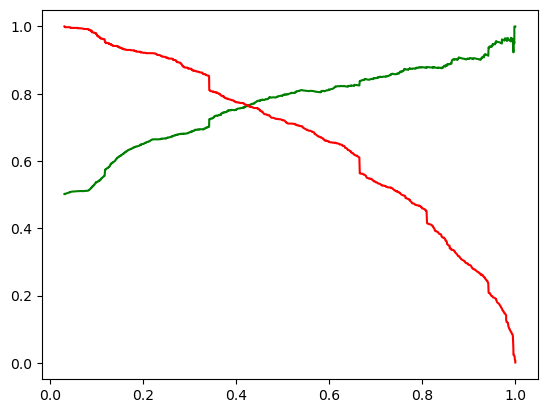

In [145]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Conclusion :
    
    - While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
      optimal 
      cut off based on Sensitivity and Specificity for calculating the final prediction.
    - Accuracy, Sensitivity and Specificity values of test set are around 77%, 75% and 79% which are approximately closer to 
      the respective values calculated using trained set.
    - Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
      around 79%
    - Hence overall this model seems to be good.   